# PRODIGY INFOTECH INTERNSHIP

DATA SCIENCE-TASK02

PROBLEM STATEMENT:

Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

DONE BY:
   
   NAME: MONICA R
   
   GMAIL: monicaram365@gmail.com

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('titanic_dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.dropna(inplace=True)
df_1=df.drop_duplicates()
df_1.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
10            11         1       3   
11            12         1       1   
..           ...       ...     ...   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
..                                   

In [6]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [7]:
pclass_names = {
    1: "First class",
    2: "Second class",
    3: "Third class"
}

df['Pclass name'] = df['Pclass'].map(pclass_names)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass name
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,First class
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,First class
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,First class
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Third class
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,First class


In [8]:
df['Family']=df["SibSp"]+df["Parch"]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass name,Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,First class,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,First class,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,First class,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Third class,2
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,First class,0


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,183.0,455.366120,247.052476,2.00,263.5,457.0,676.0,890.0000
Survived,183.0,0.672131,0.470725,0.00,0.0,1.0,1.0,1.0000
Pclass,183.0,1.191257,0.515187,1.00,1.0,1.0,1.0,3.0000
Age,183.0,35.674426,15.643866,0.92,24.0,36.0,47.5,80.0000
SibSp,183.0,0.464481,0.644159,0.00,0.0,0.0,1.0,3.0000
Parch,183.0,0.475410,0.754617,0.00,0.0,0.0,1.0,4.0000
Fare,183.0,78.682469,76.347843,0.00,29.7,57.0,90.0,512.3292
Family,183.0,0.939891,1.110239,0.00,0.0,1.0,1.0,5.0000


<AxesSubplot:>

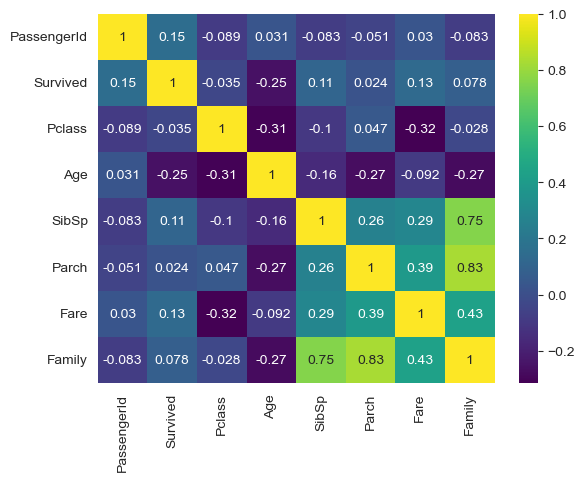

In [11]:
cont_val = df[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Family']]
sns.set_style('darkgrid')
sns.set_palette('pastel')
sns.heatmap(cont_val.corr(),cmap='viridis',annot=True)

Text(0.5, 1.0, "Distribution of passenger's classes")

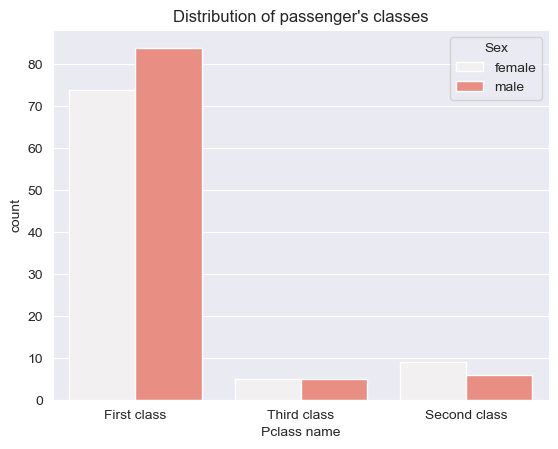

In [13]:
sns.countplot(data=df,x="Pclass name",hue='Sex',  color='salmon')
plt.title("Distribution of passenger's classes")

Text(0.5, 1.0, 'Distribution by age')

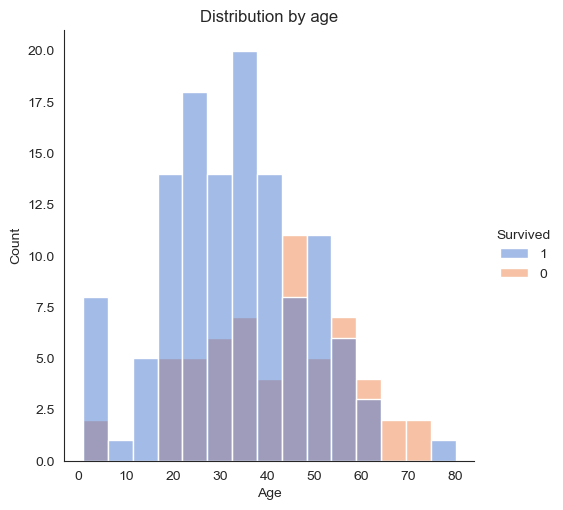

In [18]:
sns.set_style('white')
sns.displot(data=df,x="Age",bins=15,hue='Survived',palette='muted',hue_order=[1,0])
plt.title("Distribution by age")

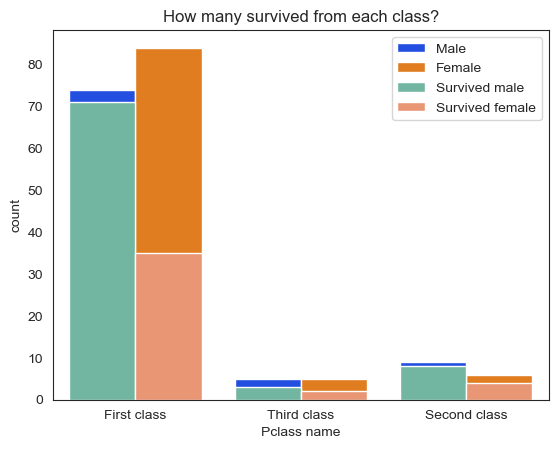

In [19]:
survived = df[df["Survived"]==1]

# Use a bright palette for the overall countplot
ax = plt.subplots()
ax = sns.countplot(data=df, x="Pclass name", hue='Sex', palette="bright")

# Use a different palette for the countplot of survived passengers
ax = sns.countplot(data=survived, x="Pclass name", hue='Sex', palette="Set2")

plt.title('How many survived from each class?')
plt.legend(labels=['Male', 'Female', 'Survived male', 'Survived female'])
plt.show()


Text(0.5, 1.0, "Distribution of passenger's family members")

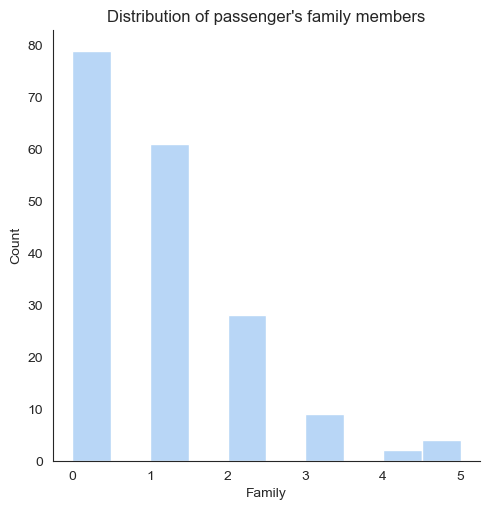

In [22]:
sns.displot(data=df,x='Family',bins=10)
plt.title("Distribution of passenger's family members")